In [ ]:
!pip install GitPython
from git import Repo

# Clone the repository
repo = Repo.clone_from(
    'https://github.com/sahil-desai18/BME-450-Project.git',
    '/content/dataset.git'
)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms
from PIL import ImageEnhance

# Define transforms for data preprocessing
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert images to grayscale
    transforms.Resize((128, 128)),  # Resize images to a fixed size
    transforms.Lambda(lambda img: ImageEnhance.Brightness(img).enhance(2)),  # Increase brightness
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalize pixel values to range [-1, 1]
])
# Define tumor type names
tumor_types = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Load the training and testing datasets
train_dataset = ImageFolder(root='dataset.git/Training', transform=transform)
test_dataset = ImageFolder(root='dataset.git/Testing', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # Batch size of 1 for one-by-one processing

# Define a simple convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 4)  # Change the output size to 4 for 4 classes

    def forward(self, x):
      x = self.pool(torch.relu(self.conv1(x)))
      x = self.pool(torch.relu(self.conv2(x)))
      features = x.clone()  # Save the intermediate features
      x = x.view(-1, 32 * 32 * 32)
      x = torch.relu(self.fc1(x))
      x = self.fc2(x)
      return x, features  # Return both the outputs and the intermediate features

# Initialize the network
net = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_losses = []  # List to store training losses

# Training the network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Enable gradients for images
        inputs.requires_grad_(True)

        optimizer.zero_grad()
        outputs, _ = net(inputs)  # Unpack the outputs and ignore the intermediate features
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            train_losses.append(running_loss / 10)  # Append the average loss for this batch to the list
            running_loss = 0.0

# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()

print('Finished Training')

[1,    10] loss: 1.459
[1,    20] loss: 0.867
[1,    30] loss: 0.874
[1,    40] loss: 0.743
[1,    50] loss: 0.588
[1,    60] loss: 0.560
[1,    70] loss: 0.569
[1,    80] loss: 0.495
[1,    90] loss: 0.580
[2,    10] loss: 0.403
[2,    20] loss: 0.388
[2,    30] loss: 0.386
[2,    40] loss: 0.455
[2,    50] loss: 0.336
[2,    60] loss: 0.333
[2,    70] loss: 0.372
[2,    80] loss: 0.420
[2,    90] loss: 0.348
[3,    10] loss: 0.290
[3,    20] loss: 0.233
[3,    30] loss: 0.290
[3,    40] loss: 0.236
[3,    50] loss: 0.178
[3,    60] loss: 0.196
[3,    70] loss: 0.172
[3,    80] loss: 0.208
[3,    90] loss: 0.143
[4,    10] loss: 0.143
[4,    20] loss: 0.140
[4,    30] loss: 0.118
[4,    40] loss: 0.121
[4,    50] loss: 0.131
[4,    60] loss: 0.147
[4,    70] loss: 0.133
[4,    80] loss: 0.161
[4,    90] loss: 0.129
[5,    10] loss: 0.116
[5,    20] loss: 0.086
[5,    30] loss: 0.074
[5,    40] loss: 0.059
[5,    50] loss: 0.051
[5,    60] loss: 0.048
[5,    70] loss: 0.077
[5,    80] 

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

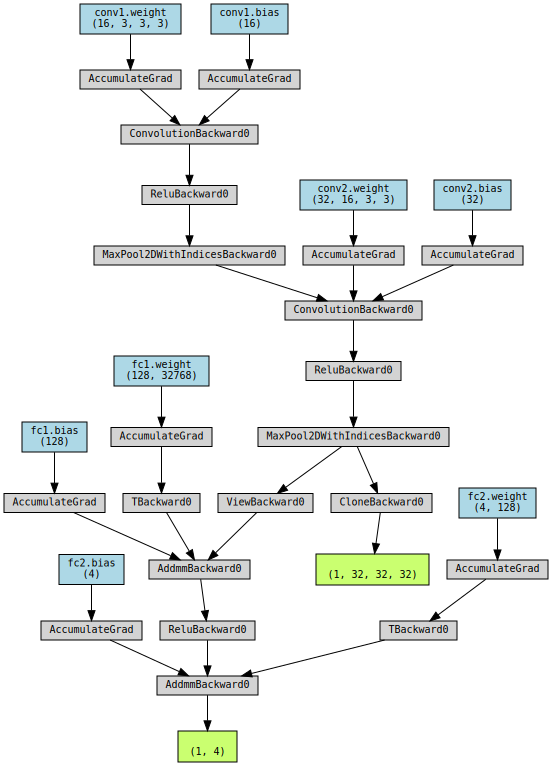

In [ ]:
!pip install torchviz
import torchviz

# Create a sample input tensor
sample_input = torch.randn(1, 3, 128, 128)  # Batch size 1, 3 channels, 128x128 image

# Visualize the network
torchviz.make_dot(net(sample_input), params=dict(net.named_parameters()))

In [ ]:
# Define tumor type names
tumor_types = ['glioma', 'meningioma', 'no tumor', 'pituitary']
# Function to predict and visualize results for one image
def predict_and_visualize(image, label, epoch, loss):
    # Forward pass
    with torch.no_grad():
        output, features = net(image.unsqueeze(0))
        predicted_class_idx = torch.argmax(output, dim=1).item()
        predicted_class = tumor_types[predicted_class_idx]
        actual_class = tumor_types[label]

    # Convert image to numpy array
    image_np = image.permute(1, 2, 0).numpy()

    # Visualize the image
    plt.imshow(image_np, cmap='gray')
    plt.title(f'Epoch: {epoch}, Loss: {loss:.4f}\nPredicted: {predicted_class}, Actual: {actual_class}')
    plt.axis('off')
    plt.show()

    # Plot where the network thinks the tumor is
    plt.imshow(image_np, cmap='gray')
    plt.imshow(features[0, 0].numpy(), cmap='hot', alpha=0.5)  # Overlay heatmap
    plt.title('Tumor Prediction')
    plt.axis('off')
    plt.show()

# Evaluation mode
net.eval()

# Lists to store predictions and actual labels
all_predictions = []
all_labels = []
accuracies = []

# Loop through each epoch
for epoch in range(10):  # Assuming you trained for 10 epochs
    # Initialize variables for each epoch
    epoch_predictions = []
    epoch_labels = []

    # Loop through the test dataset
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data

        # Forward pass
        output, features = net(inputs)
        loss = criterion(output, labels)

        # Get predictions
        _, predicted = torch.max(output, 1)
        prediction = predicted.item()
        actual = labels.item()

        # Append predictions and actual labels to the lists for this epoch
        epoch_predictions.append(prediction)
        epoch_labels.append(actual)

        # Display the image for every 10th image
        if i % 10 == 0:
            image, _ = test_dataset[i]
            predict_and_visualize(image, actual, epoch, loss.item())

    # Append the predictions and labels for this epoch to the main lists
    all_predictions.append(epoch_predictions)
    all_labels.append(epoch_labels)

    # Calculate accuracy for this epoch
    accuracy = (np.array(epoch_predictions) == np.array(epoch_labels)).mean()
    accuracies.append(accuracy)
    print(f"Accuracy for epoch {epoch+1}: {accuracy}")

# Calculate overall accuracy
overall_accuracy = np.mean(accuracies)
print(f"Overall accuracy: {overall_accuracy}")